# Delayed yield

## Import necessary modules

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expi, k0, k1  # exp. integral and two bessel functions
from wells import Wh # Hantush well function defined in module wells

def W(u): return -expi(-u) # Theis well function

## Delayed yield 

Delayed yield is a phenomenon of well drawdown in a confined aquifer, which seems to follow two differnt Theis curves, the first corresponding to the Theis curve belonging to the situation with a confined aqufier, the second corresponding to the Theis curve belonging to the situation with phreatic water.

A set of type curves that show the phenomenon is presented in the figure.

![Delayed yield](./pictures/DelayedYield3PIctures.png)

Figure: Some numerically computed delayed yield drawdown curves.

The delayed yield is caused by vertical resistance in the aquifer (or of a covering layer), making release of water from the water table decline slow relative to that from elastic strorage. Due to this, the drawdown starts off and spreads as if the aqufier was confined, first like a Theis curve, and then like a Hantush curve seeking a steady-state value. However, this steady state is not reachted, because the water table itself starts declining, like if the aquifer were phreatic. At later times the drawdown has become so slow, that this water table decline can easily cope with the water table decline and no further delay is observed, causing the drawdown to follow the Theis curve that belongs to the specific yield instead of the elastic storage.

This phenomenon is important when pumping tests are carried out in water table aquifers or aquifers covered by a semi-confined toplayer above which the water level is not maintained. Such tests, of short, may not show the delayed yield, which may lead to the hastely drawn conclusion that the "hantush" drawdown that seems to establish soon after the start of the test, is the final drawdown. However, if we would have continued our test longer, we would have cearly seen the darwdown increasing again and following the second Theis curve. The delayed drawdown can be substantially larger than the early time elastic drawdown and false conclusions may be drawn if this phenomenon is not anticipated by the designers of the pumping test.

## Delayed yield: two Theis curves

The drawdown in a confined aquifer follows Theis. The same is true for that in an unconfined aquifer (if the drawdown is not to great relative to the thickness of the aquifer, such that this thickness can be assumed constant. The difference between the two drawdowns if the transmissivity is the same in both cases, is delay of the unconfined drawdown relative to that in the confined aquifer.

Let's analyze this by starting with the Theis drawdown solution

$$ s(r,t) = \frac Q {4 \pi kD} W( u ) \,\,\,\, with \,\,\,\, u = \frac {r^2 S} {4 kD t} $$ 

The two cases differ by their storage coefficient, which is $S_e$ for the confined case and $S_y$, the specific yield, for the unconfined case. So we have

$$ u_{conf} = \frac {r^2 S_2} {4 kD t}\,\,\,\,\, and \,\,\,\,\, u_{unconf} = \frac {r^2 S_y} {4 kD t} $$

and, therefore

$$ \frac {u_{unconf}} {u_{conf}} = \frac {S_y} {S_e} $$

Given that $S_y$ is two orders of magnitude larger than $S_e$, we see that both curves are the same, except that the curve for the unconfined case is two orders of magnitude delayed with respect to the first. One can see this as the time in the unconfined case has to be $\frac {S_y} {S_e}$ times that of the confined case to get the same $W(u)$ value and, therefore the same drawdown.

We have also seen what the radius of influence was. We got it from the logarithmic approximation of the Theis dradown, which was

$$ s(r, t) \approx \frac Q {4 \pi kD } \ln \left( \frac {2.25 kD t} {r^2 S} \right) $$

and realizing that s=0 when the argument of the $\ln(\cdots)$ equals 1, so:



$$ r = \sqrt {\frac {2.25 kD t} S } $$

We see here that if $S_y$ is two orders of magnitude larger than $S_e$, the radius of influence is one order of magniture larger. So the radius of influence grows in the order of 10 times faster in the confined case than it does in the unconfined case.

This leads to delayed yield in situations where the hydraulic vertical resistance in the aquifer is relatively high. In that case the immediate drawdown is dominated by the elastic Theis case and spreads rapidly from the well. But as soon as the elastic drawdown establishes itself, will the free water table decline and providing water to the flow in the aquifer. After some time, the free water table will adapt to the elastic drawdown in the aquifer and the system will behave as if it were unconfined. So initially the head in the aquifer will behave like the Theis formula with the elastic storage coefficient, but in the long run it will be have like the Theis formula with the unconfined storage coefficient, the specific yield. Of course, there is a transition between the two curves.

If we draw the two curves on double log scale, as usual $W(u)$ versus $1/u$ then dividing $u$ by a factor. i.e. multiplyin $1/u$ by that factor implies shifting the drawdown curve to the right, but without changing its shape.



In [4]:
Se = 1e-3
Sy = 1e-1
u = np.logspace(-5., 2., 81)
ue = u
uy = ue * Sy/Se 

<IPython.core.display.Javascript object>


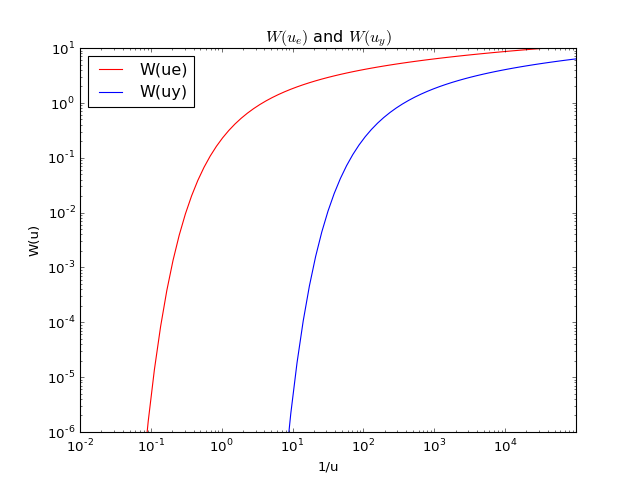

In [5]:
ax = plt.figure().add_subplot(111)
ax.set(xlabel="1/u", ylabel="W(u)", xscale="log", yscale="log",
       ylim=(1e-6, 10),       
       title="$W(u_e)$ and $W(u_y)$")
ax.plot(1/u, W(ue), 'r', label="W(ue)")
ax.plot(1/u, W(uy), 'b', label="W(uy)")
ax.legend(loc='best')
plt.show()


Figure: The two Theis curves caused by delayed yield

We see that the blue curve is equal to the red one but shifted exactly a factor $S_y/S_e = 100$ to the right, i.e. it is delayed by a factor $S_y/S_e$.

Therefore, in an unconfined aquifer with some vertical resistance, we expect the drawdown to initially follow the red curve, the elastic drawdown curve, and after some transition time follow the blue curve, the unconfined drawdown curve.

We already know the behavior of the Hantush drawdown. If a constant head is maintained above the aquifer and leakage occurs through a leaky confining layer towards the aquifer proportional to the difference between the maintained head above and the lowered head in the aquifer, then the drawdown will after some time become constant. The Hantush drawdown curves all deviate from their initial Theis start to become horizontal, the level of which depends on the distance from the well, $r$,  and the characteristic length $\lambda = \sqrt{ kD c}$ of the aquifer system. The higher the resistance, that is, the larger the $\lambda$, the longer will the drawdown follow the Theis curve and the larger will the final Hantush drawdown be.

The delayed yield situation is similar to that of Hantush until the drawdown in the overlying layer, of of the water table, becomes substantial, its supply deminishes and therefore, the drawdown must match that of the delayed Theis curve, the curve that belongs to the specific yield $S_y$.

The pumping test was carried out in the Gironde Valley in France in 1965. Bonnet at al [1970] published an analysis on teh basis of Boulton's theory. The aquifer is clayey in shallow depth and sandy to gravelly at larger depths. The aquifer bottom is at 13.75 m and the initial water table at 5.51 m, so that the wet thickness b=8.24 m.
The well was screened between 7 and 13.5 m and has a diameter of 0.32 m. The pumping lastted for 48h 50 min at a rate as 53 m3/a, but oscillated between 51 and 54.6 m3/h. Drawdowns were monitored at 10 and 30 m from the well.
Due to the large penetration, the effectof partial penetration can be neglected at 10 and 30 m. Although not probable, due to lack of information about the observation wells, their screens were assumed to be perforated over the entire depth of the aquifer. The results were consistent with this assumption, which may also mean that the vertical resistance within the coarser part of the aquifer may be neglected as it may very well be that the screen was only perforated in the coarser part of the aquifer.

The drawdown data are as follows:

In [15]:
import pdb
import csv

import wells

W = wells.W   # Theis
Wh = wells.Wh # Hantush


# Global info and prefrences for this project
proj    = "Pumping test at St. Pardon de Conques (1965)"
folder  = './ptestDelayed'
p_names = 'ptst02', 'ptst10', 'ptst30'
l_names = 'semilog02_late', 'semilog10_late', 'semilog30_late', 'semilog10_early'

plotsettings = {'xlabel':'t [s]', 'ylabel':'s [m]', 'xscale':'log',
                 'xlim':(1e-1, 1e6), 'title':proj}
pltset0 = plotsettings.copy(); pltset0['yscale']='log';   pltset0['ylim'] =(1e-2, 1.0)
pltset1 = plotsettings.copy(); pltset1['yscale']='linear'; pltset1['ylim']=(0.,0.9)



In [16]:
class Piezometer:
    """Piezometer definition"""
    
    clrs    ='brgkmcy'
    styles  = ['-',';','--','-.']
    markers = ['o','s','^','v','p','+','x','.']
    c_cnt   = -1
    l_cnt   = -1
    m_cnt   = -1
    
    def __init__(self, name="", t=np.array([]), s=np.array([]),
                 dim_t='s', dim_s='m', color=None, linestyle=None, marker=None):
        self.name = name
        self.t = t
        self.s = s
        self.dim_t = dim_t
        self.dim_s = dim_s
        self.color = color
        self.linestyle = linestyle
        self.marker = marker
        
        self.P = type(self)  # the class
        
        if color is None:
            self.color = self.nextClr()
        else:
            self.color = color
        if linestyle is None:
            self.linestyle = self.nextStyle()
        else:
            self.linestyle = linestyle
        if marker is None:
            self.marker = self.nextMarker()
        else:
            self.marker = marker
    
    def plot(self):
        ax =plt.gca()
        lspec = self.color + self.marker + self.linestyle
        ax.plot(self.t, self.s, lspec)
        
    def nextClr(self):
        C = self.P
        C.c_cnt += 1
        if C.c_cnt == len(C.clrs):
            C.c_cnt = 0
        return C.clrs[C.c_cnt]
        
    def nextStyle(self):
        C = self.P
        C.l_cnt += 1
        if C.l_cnt == len(C.styles):
            C.l_cnt = 0
        return C.styles[C.l_cnt]
    
    def nextMarker(self):
        C = self.P
        C.m_cnt += 1
        if C.m_cnt == len(C.markers):
            C.m_cnt = 0
        return C.markers[C.m_cnt]


In [17]:
def invK0(K0, tol=1e-6, verbose=False):
    "Return x if K0(x) is given (Newton Raphson)"
    x  = tol
    for i in range(100):
        f    = K0 - k0(x)
        facc = k1(x)
        x = x - f/facc
        if verbose:
            print("{:3d} {:10.3g} {:10.3g}".format(i, x, f/facc))
        if np.abs(f/facc) < tol:
            break
    return x

<IPython.core.display.Javascript object>


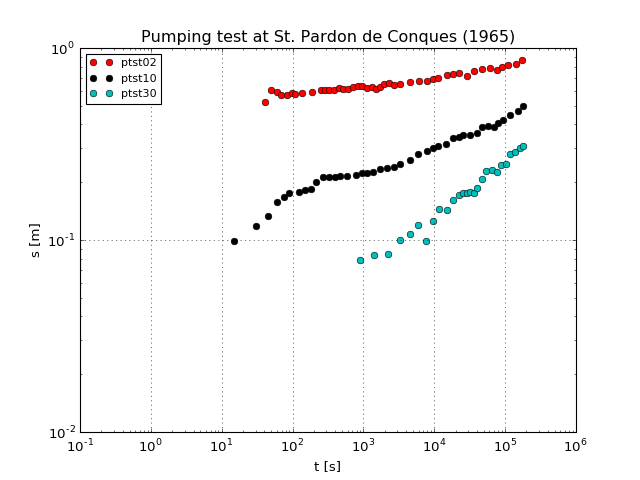

<IPython.core.display.Javascript object>


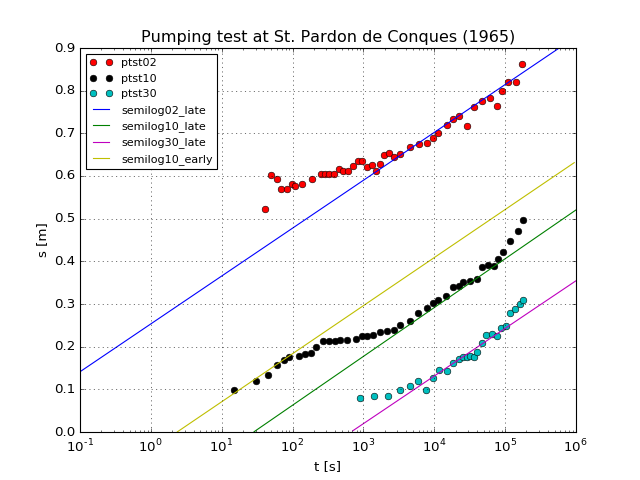

In [18]:
def get_data(folder, names, linestyle=None, marker=None):
    "Reads in the data, returns them as a list of class Piezometer"
    piezoms = []
    for name in names:
        p = Piezometer(name=name)
        fName = folder + '/' + name + '.csv'
        with open(fName) as csvfile:    
            datareader = csv.reader(csvfile, delimiter=',', quotechar="|")
            t = []
            s = []
            for j, row in enumerate(datareader):
                if j>5: # skip first 5 lines
                    t.append(row[0])
                    s.append(row[1])
        p = Piezometer(name=name, t=np.array(t), s=np.array(s), linestyle=linestyle, marker=marker)
        piezoms.append(p)
    return piezoms

piezoms   = get_data(folder, p_names, linestyle='', marker='o')
piezlines = get_data(folder, l_names, linestyle='-', marker='')

# Show the measurements

# Double log scale
ax1 = plt.figure().add_subplot(111)
ax1.set(**pltset0)
ax1.grid(True)

for p in piezoms:
    lspec = p.color + p.linestyle + p.marker
    ax1.plot(p.t , p.s, lspec, label=p.name)
ax1.legend(loc='best', fontsize='small')

# Semilog scale
ax2 = plt.figure().add_subplot(111)
ax2.set(**pltset1)
ax2.grid(True)

for p in piezoms:
    lspec = p.color + p.linestyle + p.marker
    ax2.plot(p.t, p.s, lspec, label=p.name)
    
for pl in piezlines:
    lspec = pl.color + pl.linestyle + pl.marker
    ax2.plot(pl.t, pl.s, lspec, label=pl.name)
ax2.legend(loc='best', fontsize='small')
plt.show()

The data on double log scales should reveal a picture of the delayed type curves. The first part of the lines should mimic Theis, the mediate part should tend to a horizontal line as predicts the Hantush' type curves and the last part should also mimic the later part of a Theis curve. One sees however, that it is difficult draw exact conclusions. From the continuously, almost constant rising curves, it is obvious, on the other hand, that no Theis like curve could be fitted. The same is true for the Hantush curves. The only thing we observe that gives a hint towards delayed yield is the mid part of the green line that tends to horizontal but later on starts to rise again.

We also observe some increase of drawdown at the very end of the test, at least for the piezometers at 10 and 30 m. We don't know what this is, because non of our models will give such and upward decline. But it may very well be caused by wheather influences, other boundaries, and even bounce-back of an impervious boundary far away. Therefore, without any further information regarding the conditions of the test, we ignore this deviation for our analyis.

What could help is drawing the drawdown data on linear scale but keep the time data on logarithmic scale. From the behavior of Theis curves, we know that the drawdown will follow straight lines on such graphs. That is the drawdown per log cycle is the constant and the same for all piezometers, i.e. irrespective of their distance from the well. Clearly, differences may exist in this respect between individual piezometers, due to heterogeneity of the aquifer. But we expect those to be small at the scale of some tens of meters that pertain to these piezometers.

The best way it thus to fit straight parallel lines through all of the data. Keeping the lines parallel is based on the fact that they have to be parallel in a homogeneous system, and it minimizes errors where fitting such lines is uncertain. The result is given in the figure above.

From this we conclude that the data provide indeed information on the early and late Theis curves. The first thing to conclude is that the ratio of the specific yield and the elastic storage coefficient equals the shift between the two straight lines drawn throug the green points.

$$ \frac {S_y} {S_e} = \frac {3 \times 10^{1}} {2.2 \times 10^{0}} \approx 14 $$ 

We may then compute the transmissivity and the storage coefficient using the log approximation of the Theis curve.


The change of the drawdown per logcycle is also read from the straigh lines, it is is 0.115 m

$$ s_{10t} - s_{t} = \frac Q {4 \pi kD} \ln 10  $$

So that

$$ kD = \frac Q {4 \pi} \frac {\ln 10} {0.115} $$

With $Q = 53$ m3/h = 0.0147 m3/s, this yields:

$$ kD = 0.023 \,\, m2/s = 84.4 \,\, m2/h = 2525\,\, m3/d $$

and

$$ s = \frac Q {2 \pi kD} \ln \left( \frac {2.25 kD t} { r^2 S } \right) $$

setting $s=0$, that is the argument to 1 and filling in $t$ for $s=0$ and $r$, i.e. $t=30$ s and $r=10$ m for the green data points yieding

$$ \frac {S_y} {kD} = \frac {2.25 \times 30} {10^2} = 0.675 $$

$$ S_y = 0.625 \, kD =  0.675 \times 0.023 = 1.6 \times 10^{-2} $$

and, therefore

$$ S_e = S_y / 14 = 1.13 \times 10^{-3} $$

The last property to estimate is the vertical resistance of the confining top of the aquifer. For this we need the horizontal branch of the best fitting Hantush type curve. We don't really see it in the data, but we could estimate it from the green datapoints at $s = 0.22$ m.

With this we may directly use the steady state solution for a well in a semi-confined aquifer

$$ s(r) = \frac Q {2 \pi kD} K_0 \frac r \lambda $$

$$ K_0 \frac r \lambda = 2 \pi kD \frac {s(r)} Q = 2 \pi 0.023 \times \frac {0.22} {0.0147} = 2.16 $$

By some trial and error this yields 

$$ \frac r \lambda \approx 0.131  \rightarrow \lambda = \frac {10} {0.131} = 76.3 m $$

and, therfore

$$ kDc = \lambda^2 \rightarrow c = \frac {76.3^2} {0.023} = 253000 \,\,s = 70.4 \,\, h $$

Neuman uses the term $\beta = \frac {k_z} {k_r} \frac {r^2} {D^2}$ which can be converted as follows:

$$ \beta = \frac {k_z} {k_r} \frac {r^2} {D^2} = \frac {r^2} {k_r D} \frac {k_z} {D} = \frac {r^2} {k_r D c} = \frac {r^2} {\lambda^2} $$


$$ \beta = \left( \frac {10} {76.3} \right)^2 = 0.0172 $$

$$ \frac {k_z} {k_r} = \beta \frac {D^2} {r^2} = 0.0172 \times \frac {8.24^2} {10^2} = 0.0117  $$

$$ \frac {k_r} {k_z} = 85.7 $$

$$ k_r = \frac {kD} D = \frac {0.023} {8.24} = 2.8 \times 10^{-3} \,\, m/s = 10.0 \,\, m/h $$

$$ k_z = \frac {k_r} {85.7} =  3.27 \times 10^{-5} \,\, m/s  = 0.12\,\, m/h $$

$$ c = \frac D {k_z} = \frac {8.24} {3.27 \times 10^{-5}}  = 252000\,\, sec = 70.0 \,\, h$$

In [19]:
# compute it all
def all(author, proj, t0, s, ds, sig, D=8.24, Q=53., r=10.):
    sph = 3600.
    t0   = t0/sph # [h]
    kD    = Q / (4 * np.pi) * np.log(10) / ds
    Sy    = 2.25 * kD * t0 / r**2
    Se    = Sy / sig
    besK0 = 2 * np.pi * kD * s / Q
    Lam   = r / invK0(besK0)
    beta  = (r/Lam)**2  # (r/lambda)**2
    av    = beta * (D/r)**2 # kz/kr
    kr    = kD/D
    kz    = kr * av
    c     = D/kz 

    print("\nUsing the data from {}:".format(author))    
    print("Q        = {:10.3g} m3/h".format(Q))
    print("kD       = {:10.3g} m2/h".format(kD))
    print("Sy       = {:10.3g} [-]".format(Sy))
    print("Se       = {:10.3g} [-]".format(Se))
    print("Sy/Se    = {:10.3g} [-]".format(Sy/Se))
    print("Se/Sy    = {:10.3g} [-]".format(Se/Sy))
    print("K0(r/lambda)= {:7.3g} [-]".format(besK0))
    print("r/lambda = {:10.3g} [m]".format(r/Lam))
    print("r        = {:10.3g} [m]".format(r))
    print("lambda   = {:10.3g} [m]".format(Lam))
    print("beta     = {:10.3g} [-]".format(beta))    
    print("kz/kr    = {:10.3g} [-]".format(kz/kr))
    print("kr/kz    = {:10.3g} [-]".format(kr/kz))
    print("av       = {:10.3g} [-]".format(av))
    print("kr       = {:10.3g} [m/h]".format(kr))
    print("kz       = {:10.3g} [m/h]".format(kz))
    print("c        = {:10.3g} [h]".format(c))
    print()
    
    return author, proj, Q/sph, r, D, kr/sph, kz/sph, c*sph, Sy, Se

In [20]:
# compute it all

# me (2016)
t0 = 30.# sec !
s = 0.22
ds = 0.115
sig = 14.
me = all('me', proj, t0, s, ds, sig)

# Neuman (1975)
t0 = 70 # sec !
s = 0.28
sig = 14.5
ds = 0.137
neuman = all('Neuman', proj, t0, s, ds, sig)



Using the data from me:
Q        =         53 m3/h
kD       =       84.4 m2/h
Sy       =     0.0158 [-]
Se       =    0.00113 [-]
Sy/Se    =         14 [-]
Se/Sy    =     0.0714 [-]
K0(r/lambda)=     2.2 [-]
r/lambda =      0.126 [m]
r        =         10 [m]
lambda   =       79.6 [m]
beta     =     0.0158 [-]
kz/kr    =     0.0107 [-]
kr/kz    =       93.2 [-]
av       =     0.0107 [-]
kr       =       10.2 [m/h]
kz       =       0.11 [m/h]
c        =         75 [h]


Using the data from Neuman:
Q        =         53 m3/h
kD       =       70.9 m2/h
Sy       =      0.031 [-]
Se       =    0.00214 [-]
Sy/Se    =       14.5 [-]
Se/Sy    =      0.069 [-]
K0(r/lambda)=    2.35 [-]
r/lambda =      0.108 [m]
r        =         10 [m]
lambda   =       92.8 [m]
beta     =     0.0116 [-]
kz/kr    =    0.00789 [-]
kr/kz    =        127 [-]
av       =    0.00789 [-]
kr       =        8.6 [m/h]
kz       =     0.0679 [m/h]
c        =        121 [h]



The essential difference between the results of Neuman (using the semilog method) and the indipendently derived figures, is the steady state drawdown, i.e. the Hantush case, that would pertain to the situation in which the water table would be fixed by continuous additional supply of water. That figure is difficult to obtain from the data. Given the curves a figure of 0.22 m for the r-10 m piezometer would seem valid, but 0.285 m is needed to make the results fit with those of Neuman.

Now that we have the data, we can plot both the Theis and Hantush curves together with the data to verify the match.

<IPython.core.display.Javascript object>


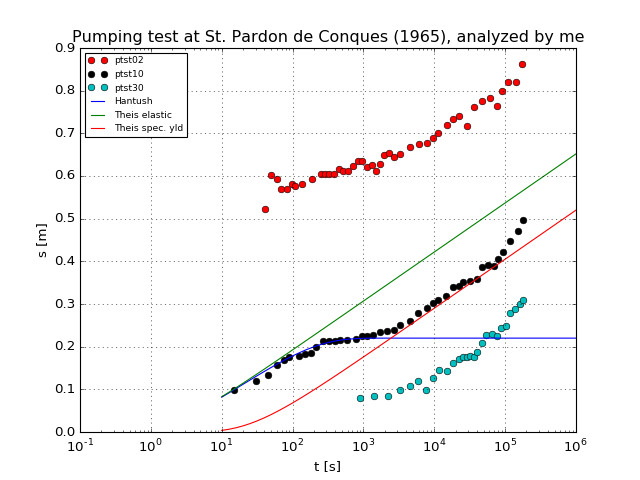

<IPython.core.display.Javascript object>


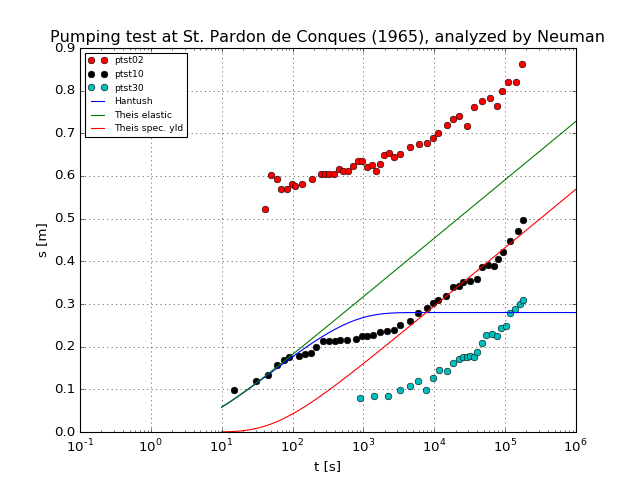

In [21]:
#def plotResult(author, proj, Q, r, Lam, c, kD, Sy, Se, t, plotset):
def plotResult(author, proj, Q, r, D, kr, kz, c, Sy, Se, t, plotset):
    
    kD = kr * D
    Lam = np.sqrt(kD * c)
    
    ue = r**2 *Se /(4 * kD * t)
    uy = r**2 *Sy /(4 * kD * t)

    sh = Q/ (4 * np.pi * kD) * Wh(ue, r/Lam)
    se = Q/ (4 * np.pi * kD) * W(ue)
    sy = Q/ (4 * np.pi * kD) * W(uy)


    ax = plt.figure().add_subplot(111)
    ax.set(**plotset)
    ax.set_title(proj +  ", analyzed by " + author)
    ax.grid(True)

    for p in piezoms:
        lspec = p.color + p.linestyle + p.marker
        ax.plot(p.t , p.s, lspec, label=p.name)

    ax.plot(t, sh.ravel(), label='Hantush')
    ax.plot(t, se, label='Theis elastic')
    ax.plot(t, sy, label='Theis spec. yld')

    ax.legend(loc='best', fontsize='x-small')
    plt.show()
    
    return ax
    
sph = 3600. # seconds per hour
t = np.logspace(1, 6, 51) # seconds

ax3 = plotResult(*me, t, pltset1)
ax4 = plotResult(*neuman, t, pltset1)

In conclusion, the curves analysed here deviate little from the measurements. We had to approximate the steady-state drawdown without delayed yield, to obtain a value for $ r/\lambda $. The value chosen was 0.22 m, whereas the value that follows from the results of Neuman would be .28 m, corresponding to the horizontal branch of the Hantush curves. Neuman's results do not seem to agree with the Hantush curve that is expected to match. It is, however, unclear what the reason for this difference is. It could be tested using a numerical model.

In [22]:
modules = '/Users/Theo/GRWMODELS/Python_projects/mfpy/modules/'

import sys

if not modules in sys.path:
    sys.path.insert(0, modules)
    
import mfgrid as grid
import fdm_t

<IPython.core.display.Javascript object>


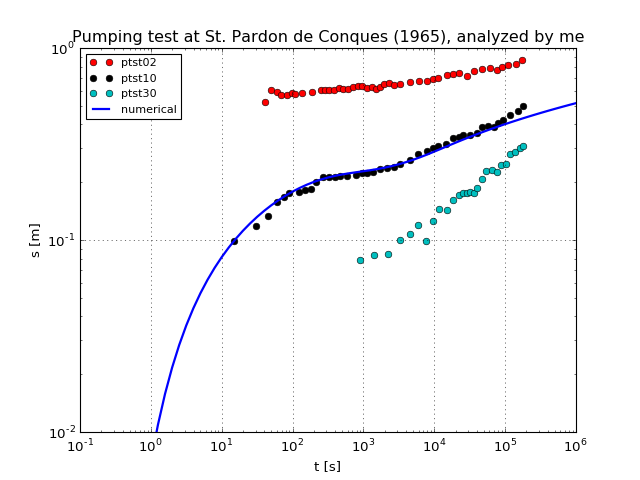

<IPython.core.display.Javascript object>


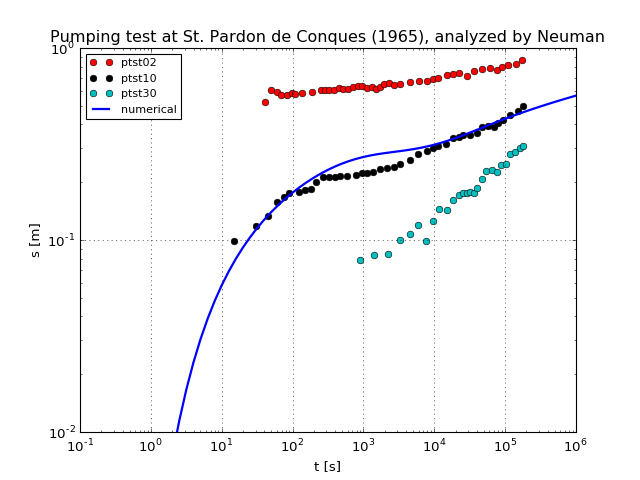

me
Running in axial mode, y-values are ignored.
Neuman
Running in axial mode, y-values are ignored.


In [23]:
# author, r, Q, D, kr, kz, c, Sy, Se
t = np.logspace(-1, 6, 71)
ax3 = plt.figure().add_subplot(111)
ax4 = plt.figure().add_subplot(111)

def numMdl(author, proj, Q, r, D, kr, kz, c, Sy, Se, t, ax, piezoms=None):
    print(author)
    x = np.logspace(-1, 4, 51)
    y = np.array([-0.5, 0.5])
    z = np.array([0.01, 0.0, -D])
    gr = grid.Grid(x, y, z, axial=True)

    Kr = gr.const(kr)
    Kz = gr.const(kr); Kz[:,:,0] = gr.dz[0] / c / 2.
    Ss = gr.const(Se/D)
    Ss[:,:,0] = Sy/gr.dz[0]
    IBOUND = gr.const(1)
    FQ = gr.const(0.)
    FH = gr.const(0.)
    FQ[0,0,-1] = Q

    out   = fdm_t.fdm3t(gr, t, (Kr, Kr, Kz), Ss, FQ, FH, IBOUND)
    # Get heads in lower layer
    phi = out.Phi.reshape((len(t), gr.Nx, gr.Nz))
    phi   = out.Phi[:,0,:,-1]
    # interpolate r on x-grid
    up = np.interp(r, gr.xm, np.arange(gr.Nx))
    u, iu = up - int(up), int(up)
    # interpolate phi to get data exactly on x=r
    phi_t = phi[:,iu] + u * (phi[:,iu+1] - phi[:,iu])
    
    if not piezoms is None:
        for p in piezoms:
            lspec = p.color + p.linestyle + p.marker
            ax.plot(p.t , p.s, lspec, label=p.name)

    ax.plot(t, phi_t, 'b', linewidth=2, label='numerical')
    ax.legend(loc='best', fontsize='small')
    ax.set(xlabel='t [s]', ylabel='s [m]', xscale='log', yscale='log', ylim=(1e-2, 1.),
          title = proj + ', analyzed by ' + author)
    ax.grid(True)
    return out
            
out1 = numMdl(*me    , t, ax3, piezoms)
out2 = numMdl(*neuman, t, ax4, piezoms)

plt.show()

The numerical model show a good agreement with the measurements. This is not the case for the data that Neuman (1975) obtained.